<h2><b>EDA</b> PCOS Genética</h2>

En esta sección se realiza un Análisis Exploratorio de Datos (EDA) enfocado en los factores genéticos, hormonales y biológicos relacionados con el Síndrome de Ovario Poliquístico (PCOS). Además de los hábitos de vida, las características físicas y antecedentes familiares pueden influir significativamente en el desarrollo y la manifestación del síndrome.

El análisis considera un conjunto de variables que abarcan aspectos genéticos, hormonales y de salud metabólica, con el objetivo de identificar patrones que puedan diferenciar a las mujeres con y sin PCOS:

Age: edad de las participantes, factor relevante dado que el PCOS suele manifestarse en mujeres jóvenes en edad reproductiva.

Height_range y Weight_Range: rangos de altura y peso, que permiten evaluar la composición corporal y su relación con el riesgo de PCOS.

Family_History_PCOS: presencia de antecedentes familiares de PCOS, un indicador importante de predisposición genética.

Hormonal_Imbalance: desequilibrio hormonal detectado, relacionado con las irregularidades menstruales y la disfunción ovárica características del síndrome.

Hyperandrogenism: exceso de andrógenos, una de las principales manifestaciones clínicas del PCOS.

Hirsutism: crecimiento excesivo de vello corporal, síntoma asociado al hiperandrogenismo.

Mental_Health: estado de salud mental, que puede verse afectado por los síntomas y cambios hormonales asociados al PCOS.

Conception_Difficulty: dificultades para concebir, reflejo del impacto del síndrome en la fertilidad.

Insulin_Resistance: resistencia a la insulina, uno de los factores metabólicos más vinculados al desarrollo del PCOS.

Diabetes: presencia de diabetes, enfermedad que puede coexistir o desarrollarse como consecuencia de la resistencia a la insulina.

Cardiovascular_Disease: enfermedades cardiovasculares, posibles complicaciones derivadas de los desequilibrios metabólicos asociados al síndrome.

El objetivo de este análisis es explorar las relaciones entre estos factores biológicos y la presencia de PCOS, identificando posibles asociaciones que ayuden a comprender mejor la influencia genética, hormonal y metabólica en el desarrollo del trastorno.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/pcos_genetica.csv')
df

,PCOS,Age,Height_range,Weight_Range,Family_History_PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Cardiovascular_Disease
0,0.0,20-25,150-160,60-70,0.0,0.0,0,0.0,1,0,0.0,0.0,0.0
1,0.0,0-20,160-170,50-60,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0
2,0.0,0-20,160-170,80-90,1.0,0.0,0,1.0,1,0,0.0,0.0,0.0
3,0.0,20-25,160-170,50-60,1.0,1.0,0,1.0,1,1,0.0,0.0,0.0
4,0.0,0-20,160-170,50-60,0.0,0.0,0,0.0,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.0,0-20,150-160,30-50,0.0,1.0,0,1.0,1,0,1.0,0.0,0.0
169,1.0,20-25,170-180,80-90,0.0,1.0,0,0.0,1,0,0.0,0.0,0.0
170,1.0,20-25,160-170,30-50,1.0,1.0,1,1.0,1,1,0.0,0.0,0.0
171,0.0,0-20,120-130,50-60,0.0,1.0,0,0.0,1,0,0.0,0.0,0.0


In [7]:
# Porcentaje de PCOS por rango de edad
pcos_age = df.groupby('Age')['PCOS'].mean() * 100
print("Porcentaje de PCOS por rango de edad:")
for grupo, valor in pcos_age.items():
    print(f"{grupo}: {valor:.2f}%")

# Porcentaje de PCOS por rango de altura
pcos_height = df.groupby('Height_range')['PCOS'].mean() * 100
print("\nPorcentaje de PCOS por rango de altura:")
for grupo, valor in pcos_height.items():
    print(f"{grupo}: {valor:.2f}%")
    
# Porcentaje de PCOS por rango de peso
pcos_weight = df.groupby('Weight_Range')['PCOS'].mean() * 100
print("Porcentaje de PCOS por rango de peso:")
for grupo, valor in pcos_weight.items():
    print(f"{grupo}: {valor:.2f}%")

Porcentaje de PCOS por rango de edad:
0-20: 10.71%
20-25: 27.45%
25-30: 75.00%
30-35: 50.00%
35-44: 0.00%
45-100: 0.00%

Porcentaje de PCOS por rango de altura:
120-130: 0.00%
140-150: 42.86%
150-160: 25.93%
160-170: 17.98%
170-180: 26.32%
180-190: 0.00%
Porcentaje de PCOS por rango de peso:
100-120: 0.00%
30-50: 17.24%
50-60: 10.94%
60-70: 36.11%
70-80: 71.43%
80-90: 50.00%


In [ ]:
habit_cols = [
    "Family_History_PCOS", "Hormonal_Imbalance", "Hyperandrogenism",
    "Hirsutism", "Mental_Health", "Conception_Difficulty",
    "Insulin_Resistance", "Diabetes", "Cardiovascular_Disease"
]

for col in habit_cols:
    con = df[df[col] == 1]
    sin = df[df[col] == 0]
    
    pcos_con = int(round(con["PCOS"].mean() * 100))
    pcos_sin = 100 - pcos_con  # Aseguramos que sume 100
    
    print(f"{col}:")
    print(f"  % con PCOS: {pcos_con}%")
    print(f"  % sin PCOS: {pcos_sin}%\n")

# Total general
total_pcos = int(round(df["PCOS"].mean() * 100))
total_no_pcos = 100 - total_pcos
print(f"Total dataset:")
print(f"  % con PCOS: {total_pcos}%")
print(f"  % sin PCOS: {total_no_pcos}%")

Family_History_PCOS:
  % con PCOS: 38%
  % sin PCOS: 62%

Hormonal_Imbalance:
  % con PCOS: 36%
  % sin PCOS: 64%

Hyperandrogenism:
  % con PCOS: 83%
  % sin PCOS: 17%

Hirsutism:
  % con PCOS: 50%
  % sin PCOS: 50%

Mental_Health:
  % con PCOS: 28%
  % sin PCOS: 72%

Conception_Difficulty:
  % con PCOS: 52%
  % sin PCOS: 48%

Insulin_Resistance:
  % con PCOS: 70%
  % sin PCOS: 30%

Diabetes:
  % con PCOS: 100%
  % sin PCOS: 0%

Cardiovascular_Disease:
  % con PCOS: 80%
  % sin PCOS: 20%

Total dataset:
  % con PCOS: 22%
  % sin PCOS: 78%


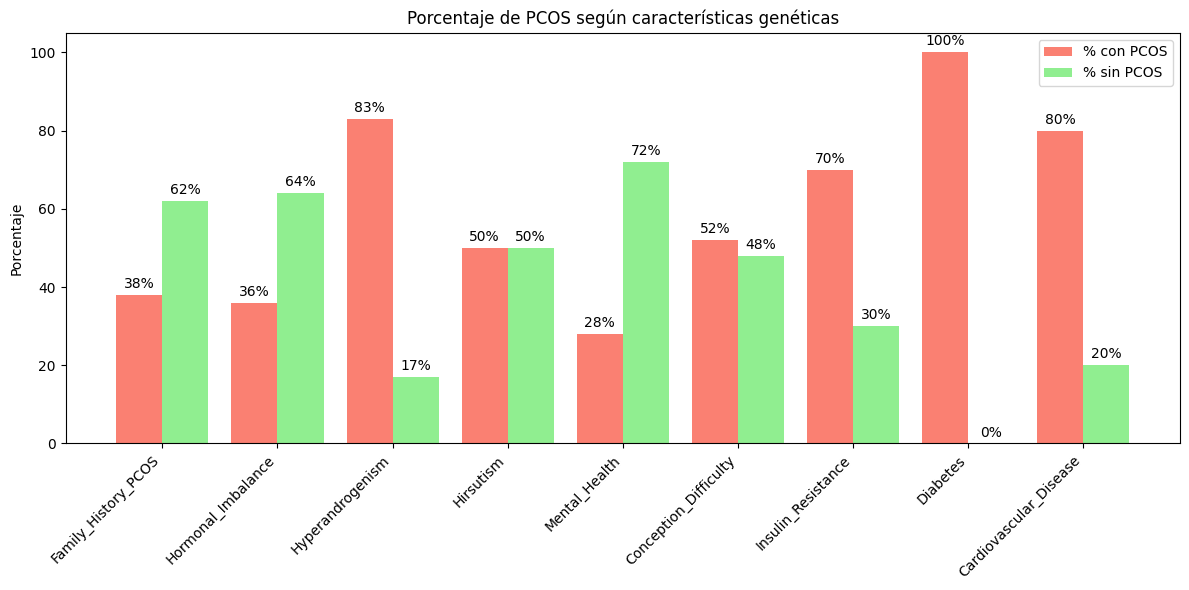

In [ ]:
# Guardamos los porcentajes en listas
pcos_vals = []
no_pcos_vals = []

for col in habit_cols:
    con = df[df[col] == 1]
    pcos_con = int(round(con["PCOS"].mean() * 100))
    pcos_vals.append(pcos_con)
    no_pcos_vals.append(100 - pcos_con)

# Posiciones en el eje X
x = np.arange(len(habit_cols))
width = 0.4

fig, ax = plt.subplots(figsize=(12,6))

# Barras
ax.bar(x - width/2, pcos_vals, width, label='% con PCOS', color='salmon')
ax.bar(x + width/2, no_pcos_vals, width, label='% sin PCOS', color='lightgreen')

# Texto encima de cada barra
for i in range(len(habit_cols)):
    ax.text(i - width/2, pcos_vals[i]+1, f"{pcos_vals[i]}%", ha='center', va='bottom', fontsize=10)
    ax.text(i + width/2, no_pcos_vals[i]+1, f"{no_pcos_vals[i]}%", ha='center', va='bottom', fontsize=10)

# Etiquetas y estilo
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de PCOS según características genéticas')
ax.set_xticks(x)
ax.set_xticklabels(habit_cols, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

<h2><b>EDA</b> PCOS Habitos</h2>